In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Inlezen van de dataset en overzicht

In [2]:
#Inlezen van de dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,92,62,32,126,32.0,85.0,46,0
1,2,125,60,20,140,33.8,88.0,31,0
2,0,117,80,31,53,45.2,89.0,24,0
3,1,87,78,27,32,34.6,101.0,22,0
4,3,116,74,15,105,26.3,107.0,24,0
5,1,128,82,17,183,27.5,115.0,22,0
6,4,110,76,20,100,28.4,118.0,27,0
7,6,105,70,32,68,30.8,122.0,37,0
8,1,157,72,21,168,25.6,123.0,24,0
9,2,102,86,36,120,45.5,127.0,23,1


In [3]:
# Beschrijvende statistische analyse
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,3.307895,122.847368,70.863158,29.034211,156.960526,33.044211,492.057553,30.863158,0.336842
std,3.229554,31.058254,12.551202,10.422291,119.872430,6.946588,339.668070,10.210306,0.473254
min,0.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.150000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,77.000000,28.400000,256.750000,23.000000,0.000000
50%,2.000000,120.000000,70.000000,29.000000,125.500000,33.200000,432.000000,27.000000,0.000000
75%,5.000000,144.000000,78.500000,37.000000,190.250000,37.025000,677.250000,36.000000,1.000000
max,17.000000,198.000000,110.000000,60.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


# Visualiseren van de dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b85874240>,
      dtype=object)

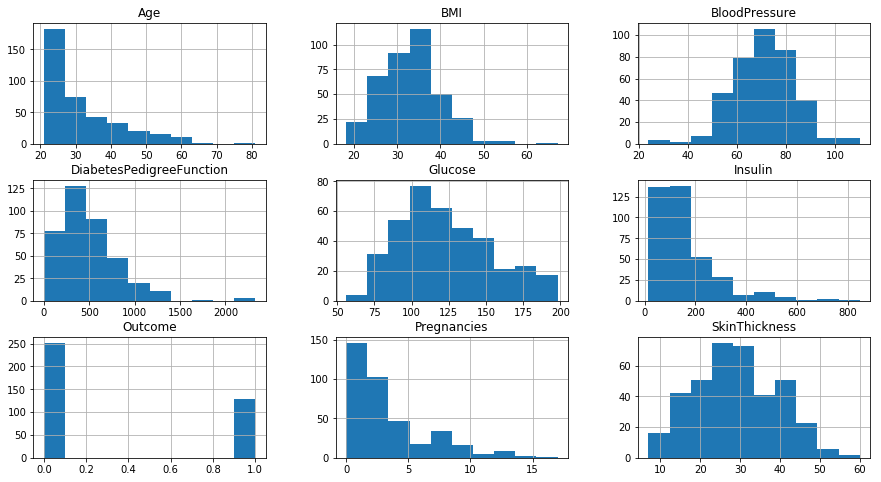

In [4]:
# Histogram
dataset.hist(figsize=(15,8))

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

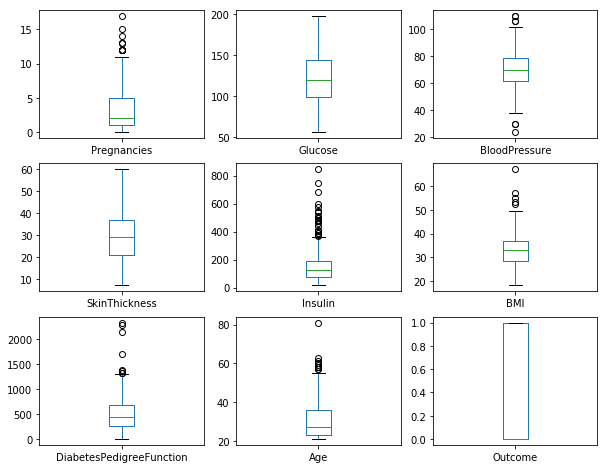

In [5]:
# Box plot
dataset.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

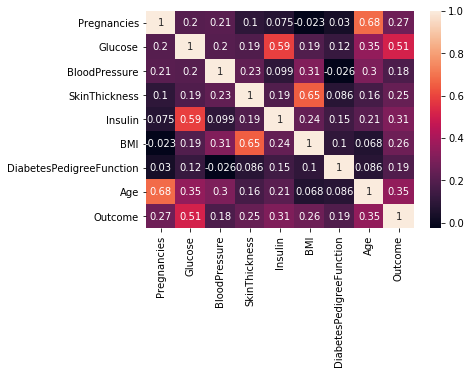

In [6]:
# Correlation plot
Corr=dataset[dataset.columns].corr() 
sns.heatmap(Corr, annot=True)

# Preprocessing en opsplitsen in training en test set

In [3]:
# Opsplitsen in features en targets
features = list(dataset.columns[:8])
print(features)
X = dataset[features].values 

y= dataset['Outcome'].values

# Opsplitsen van data in een training en test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)
print(X_train.shape)

# Normalisatie van de dataset

scaler = preprocessing.StandardScaler().fit(X_train)  # Normaliseer naar gemiddelde = 0 en standaardafwijking = 1
#scaler = preprocessing.MaxAbsScaler().fit(X_train)   # Deel elke waarde door de absolute waarde van het maximum
#scaler = preprocessing.MinMaxScaler().fit(X_train)   # Trek van elke waar het min af en deel door (MAX - MIN)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
(304, 8)


# Logistic regression

## Initialiseren en trainen van de logistic regression classifier

In [6]:
# Initialiseren van de logistic regression classifier

logreg = linear_model.LogisticRegression(C=1,class_weight= None)

#logreg = linear_model.LogisticRegression(C=1,class_weight= 'balanced')

In [7]:
# Training van het model
logreg.fit(X_train, y_train)

print('De bias = theta_0: ', logreg.intercept_)
print('De coefficienten theta: ',logreg.coef_)

De bias = theta_0:  [-1.02850968]
De coefficienten theta:  [[0.28983316 1.26342755 0.00874459 0.21733253 0.01804845 0.34897793
  0.52486365 0.27734404]]


/home/wouter/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Testen van het model op de test set

In [8]:
# Testen van het model op de test set

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        48
           1       0.67      0.50      0.57        28

   micro avg       0.72      0.72      0.72        76
   macro avg       0.71      0.68      0.68        76
weighted avg       0.72      0.72      0.71        76

[[41  7]
 [14 14]]
72.36842105263158


## Predictie op een nieuwe patiënt

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 - 
SkinThickness:20 - 
Insulin:21 - 
BMI:24.3 - 
DiabetesPedigreeFunction:128 - 
Age: 37

In [11]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

print(patient)
y_patient = logreg.predict(patient.reshape(1,-1))
y_patient_prob = logreg.predict_proba(patient.reshape(1,-1))
print(y_patient)
print(y_patient_prob)

if y_patient == 0:
    print('Patiënt heeft geen diabetes')
else:
    print('Patiënt heeft diabetes')

[[-0.41420941  0.30209759  0.25992289 -0.84670314 -1.13434945 -1.2724308
  -1.0725144   0.62170047]]
[0]
[[0.85859249 0.14140751]]
Patiënt heeft geen diabetes


# SVM zonder kernel (= lineaire kernel)

## Initialiseren en trainen van SVM 

In [12]:
SVMlinear = svm.SVC(kernel='linear',C=0.1)
SVMlinear.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Testen van het model op test set

In [13]:
y_pred = SVMlinear.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        48
           1       0.72      0.46      0.57        28

   micro avg       0.74      0.74      0.74        76
   macro avg       0.73      0.68      0.69        76
weighted avg       0.73      0.74      0.72        76

[[43  5]
 [15 13]]
73.68421052631578


## Predictie op een nieuwe patiënt

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 - 
SkinThickness:20 - 
Insulin:21 - 
BMI:24.3 - 
DiabetesPedigreeFunction:128 - 
Age: 37

In [14]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

y_patient = SVMlinear.predict(patient.reshape(1,-1))
print(y_patient)
if y_patient == 0:
    print('Patiënt heeft geen diabetes')
else:
    print('Patiënt heeft diabetes')


[0]
Patiënt heeft geen diabetes


# SVM met kernel

## Initialiseren en trainen van de SVM

In [15]:
SVMkernel = svm.SVC(kernel='rbf',C=0.1,gamma=0.1)
#SVMkernel = svm.SVC(kernel='poly',C=1)
SVMkernel.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Testen van het model op test set

In [16]:
y_pred = SVMkernel.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.69      0.98      0.81        48
           1       0.88      0.25      0.39        28

   micro avg       0.71      0.71      0.71        76
   macro avg       0.78      0.61      0.60        76
weighted avg       0.76      0.71      0.66        76

[[47  1]
 [21  7]]
71.05263157894737


## Predictie op een nieuwe patiënt

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 - 
SkinThickness:20 - 
Insulin:21 - 
BMI:24.3 - 
DiabetesPedigreeFunction:128 - 
Age: 37

In [17]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

y_patient = SVMkernel.predict(patient.reshape(1,-1))
print(y_patient)
if y_patient == 0:
    print('Patiënt heeft geen diabetes')
else:
    print('Patiënt heeft diabetes')


[0]
Patiënt heeft geen diabetes


# Gridsearch en cross-validation

## Gridsearch op logistic regression

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
paramaters = [
             {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000]}                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 20,
                           n_jobs = -1,
                           verbose=5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

NameError: name 'X_train' is not defined

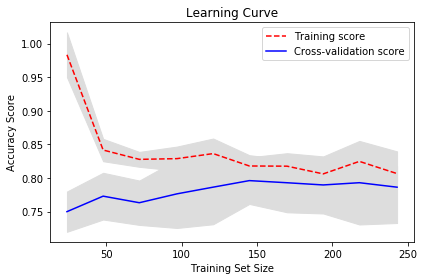

In [19]:
from sklearn.model_selection import learning_curve 

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(C=10000),
                                                        X_train, y_train,cv=5, scoring='accuracy',
                                                        n_jobs=-1,train_sizes=np.linspace(0.1, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Gridsearch op SVM

In [4]:
from sklearn.model_selection import GridSearchCV
#from sklearn.learning_curve import learning_curve
from sklearn.svm import SVC
#from sklearn import cross_validation
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

model = SVC()
paramaters = [ 
        {'kernel': ['linear'], 'C': np.linspace(1,20,100)},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2]},
        {'kernel': ['poly'], 'C':[1, 10]} ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10, # K
                           n_jobs = -1,
                           verbose = 4)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 




Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    1.4s


Best accuracy :  0.7993421052631579
Best parameters : {'C': 4.070707070707071, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        48
           1       0.70      0.50      0.58        28

   micro avg       0.74      0.74      0.74        76
   macro avg       0.72      0.69      0.70        76
weighted avg       0.73      0.74      0.73        76

[[42  6]
 [14 14]]
73.68421052631578


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    3.3s finished
/home/wouter/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
best_model = svm.SVC(C = 4.07, kernel='linear')
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        48
           1       0.70      0.50      0.58        28

   micro avg       0.74      0.74      0.74        76
   macro avg       0.72      0.69      0.70        76
weighted avg       0.73      0.74      0.73        76

[[42  6]
 [14 14]]
73.68421052631578


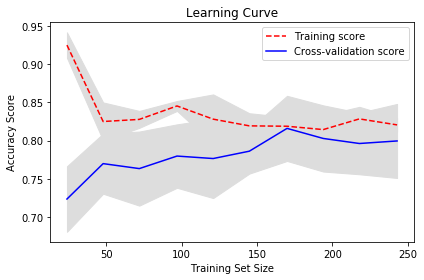

In [23]:
from sklearn.model_selection import learning_curve 

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='linear',C=1),
                                                        X_train, y_train,cv=5, scoring='accuracy',
                                                        n_jobs=-1,train_sizes=np.linspace(0.1, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()